In [120]:
import pandas as pd
import json
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
import sqlite3
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [103]:
import pandas as pd
import sqlite3

# Caminho para o banco de dados
db_path = '/Users/leonardooliveira/Desktop/PBI-EXAI/Projeto-BI/DADOS PROJETO BI/Experimentai.db'
conn = sqlite3.connect(db_path)

# Leitura das tabelas do banco de dados
df_gosto = pd.read_sql_query("SELECT * FROM DimGostoBaseNova;", conn)
df_demografico = pd.read_sql_query("SELECT * FROM DimDemograficoBaseNova;", conn)
df_cliente_fato = pd.read_sql_query("SELECT * FROM clienteFato;", conn)

# Fechar a conexão com o banco de dados
conn.close()

# Fazer o merge usando outer join para incluir todas as linhas
base = pd.merge(df_cliente_fato, df_gosto, on='id_gosto', how='inner')
base = pd.merge(base, df_demografico, on='id_demografico', how='inner')
base.isnull().sum()


id_fato                   0
id_cliente                0
data_inscricao            0
rede_social               0
renda_id                  0
id_demografico            0
id_gosto                  0
moda                      0
pessoa_artistica          0
maquiagem                 0
brinquedos_ou_jogos       0
esportes                  0
tem_pet                   0
decorar_casa              0
alimento_saudavel         0
gastronomia               0
carro                     0
bebida_alcoolica          0
cuidados_pessoais         0
tecnologia                0
mae_ou_pai                0
influencer                0
restricoes_alimentares    0
objetivo_id               0
id                        0
data_nascimento           6
genero                    0
email                     0
cidade                    0
estado                    0
idade                     6
faixa_etaria              6
bairro                    0
assinantes                0
dtype: int64

In [104]:
base = base.dropna()

In [105]:
assinantes = base[base['assinantes'] == 1]

In [114]:
assinantes.isnull().sum()

rede_social               0
renda_id                  0
moda                      0
pessoa_artistica          0
maquiagem                 0
brinquedos_ou_jogos       0
esportes                  0
tem_pet                   0
decorar_casa              0
alimento_saudavel         0
gastronomia               0
carro                     0
bebida_alcoolica          0
cuidados_pessoais         0
tecnologia                0
mae_ou_pai                0
influencer                0
restricoes_alimentares    0
objetivo_id               0
data_nascimento           0
genero                    0
cidade                    0
estado                    0
idade                     0
bairro                    0
assinantes                0
dtype: int64

In [107]:
assinantes.columns

Index(['id_fato', 'id_cliente', 'data_inscricao', 'rede_social', 'renda_id',
       'id_demografico', 'id_gosto', 'moda', 'pessoa_artistica', 'maquiagem',
       'brinquedos_ou_jogos', 'esportes', 'tem_pet', 'decorar_casa',
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica',
       'cuidados_pessoais', 'tecnologia', 'mae_ou_pai', 'influencer',
       'restricoes_alimentares', 'objetivo_id', 'id', 'data_nascimento',
       'genero', 'email', 'cidade', 'estado', 'idade', 'faixa_etaria',
       'bairro', 'assinantes'],
      dtype='object')

In [123]:
assinantes.head(5)

,rede_social,renda_id,moda,pessoa_artistica,maquiagem,brinquedos_ou_jogos,esportes,tem_pet,decorar_casa,alimento_saudavel,...,mae_ou_pai,influencer,restricoes_alimentares,objetivo_id,genero,cidade,estado,idade,bairro,assinantes
5,0,R$0 - 3.000,1,0,0,1,1,0,1,1,...,0,1,Amendoim,1,1,Piracaia,São Paulo,-1.160846,Centro,1
425,0,R$0 - 3.000,1,1,1,1,1,1,1,1,...,0,1,Outro,1,1,Sao paulo,São Paulo,-0.803313,Santo Amaro,1
575,1,R$8.000 - 16.000,1,0,1,1,1,1,1,1,...,0,0,,0,1,São Paulo,São Paulo,0.030932,Chácara Califórnia,1
621,1,R$3.000 - 8.000,1,1,1,0,1,1,1,1,...,0,1,,1,0,Indaiatuba,São Paulo,3.487088,Jardim Residencial Santa Clara,1
675,0,R$0 - 3.000,1,1,0,1,1,1,1,1,...,0,1,,1,1,São José dos Campos,São Paulo,-0.207424,Condomínio Royal Park,1


In [117]:
assinantes.columns

Index(['rede_social', 'renda_id', 'moda', 'pessoa_artistica', 'maquiagem',
       'brinquedos_ou_jogos', 'esportes', 'tem_pet', 'decorar_casa',
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica',
       'cuidados_pessoais', 'tecnologia', 'mae_ou_pai', 'influencer',
       'restricoes_alimentares', 'objetivo_id', 'genero', 'cidade', 'estado',
       'idade', 'bairro', 'assinantes'],
      dtype='object')

In [ ]:
del assinantes['id_fato']
del assinantes['id_cliente']
del assinantes['data_inscricao']
del assinantes['id']
del assinantes['faixa_etaria']
del assinantes['email']
del assinantes['id_gosto']
del assinantes['id_demografico']
del assinantes['data_nascimento']

para o objetivo, temos 1 para o seguinte objetivo 'Quero dar a minha opinião sobre produtos'
e zero para o seguinte 'Quero descobrir novos produtos para comprar'

para o genero, teremos 1 para feminino e 0 para masculino

In [111]:
assinantes['objetivo_id'] = assinantes['objetivo_id'].apply(lambda x: 1 if x == 'Quero dar a minha opinião sobre produtos' else 0)
assinantes['genero'] = assinantes['genero'].apply(lambda x: 1 if x == 'Feminino' else 0)


In [122]:
for coluna in assinantes.select_dtypes(include=['float64', 'int64']).columns:
    # Ignorar as colunas binárias (0 e 1), normalizando apenas outras variáveis numéricas
    if assinantes[coluna].nunique() > 2:
        assinantes[coluna] = stats.zscore(assinantes[coluna])

Tracar o perfil dos assinantes com base na idade do cliente, isso pode ser que nos ajude a melhorar a precisao
Com base no comportamento dos usuarios (de acordo com a faixa etaria), precisamos ter a possibilidade de sugerir produtos que eles gostem mais
Testar com base na faixa de renda

Fazer o agrupamento hierarquico

apos a analise descritiva dos clusters, fazer queries usando alguns pontos de mais importancia dentro de cada cluster, (logica de query if x, y or x, y, z)


In [124]:
features = assinantes[['idade', 'renda_id', 'restricoes_alimentares', 
                       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
                       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel', 
                       'gastronomia', 'carro', 'mae_ou_pai', 'bebida_alcoolica',
                       'cuidados_pessoais', 'tecnologia', 'influencer', 'estado', 'renda_id', 'genero', 'objetivo_id', 'rede_social']]

features = pd.get_dummies(features, columns=['idade', 'renda_id', 'restricoes_alimentares', 
                       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
                       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel', 
                       'gastronomia', 'carro', 'mae_ou_pai', 'bebida_alcoolica',
                       'cuidados_pessoais', 'tecnologia', 'influencer','estado',
                       'genero', 'objetivo_id', 'rede_social'], drop_first=True)




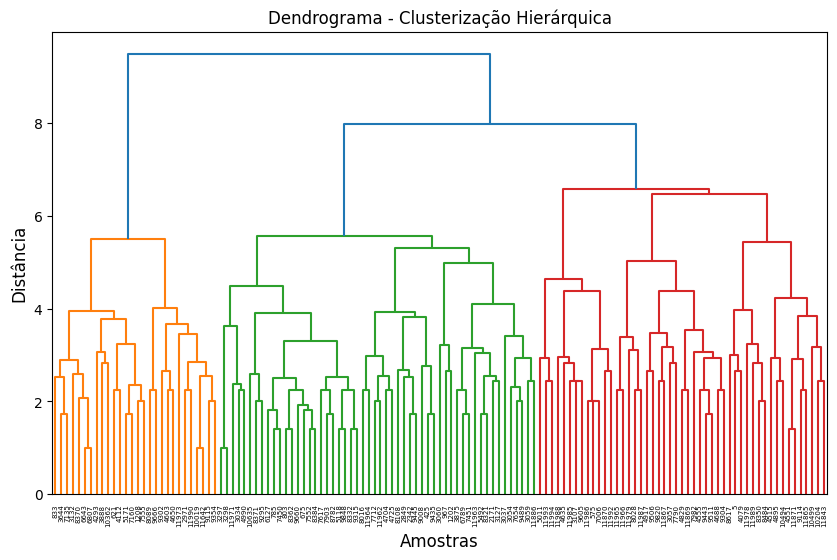

In [125]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(features, method='ward', metric='euclidean'),
    orientation='top',  # Altere para 'left', 'right', 'top' ou 'bottom'
    labels=list(features.index) if hasattr(features, 'index') else None
)
plt.title('Dendrograma - Clusterização Hierárquica', fontsize=12)
plt.xlabel('Amostras', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.axhline(y=15, color='red', linestyle='--')  # Defina o corte desejado
plt.show()

In [126]:
clusters = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
assinantes['cluster'] = clusters.fit(features)

In [134]:
from scipy.spatial.distance import cdist
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    # Definir a clusterização hierárquica com `metric` e `linkage`
    aglom = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = aglom.fit_predict(features)

    # Calcular a soma das distâncias ao centroide de cada cluster (métrica similar ao WCSS)
    cluster_wcss = 0
    for j in range(i):
        cluster_points = features[labels == j]
        centroid = cluster_points.mean(axis=0)
        distances = cdist(cluster_points, [centroid], metric='euclidean')
        cluster_wcss += np.sum(distances ** 2)
    
    wcss.append(cluster_wcss)

print(wcss)

[np.float64(655.8931297709923), np.float64(610.9292649098475), np.float64(579.0317460317461), np.float64(557.3543956043956), np.float64(536.3663495087644), np.float64(520.8774606198755), np.float64(505.7554368103517), np.float64(491.00417630615004), np.float64(476.87416122319377), np.float64(464.2523567119156)]


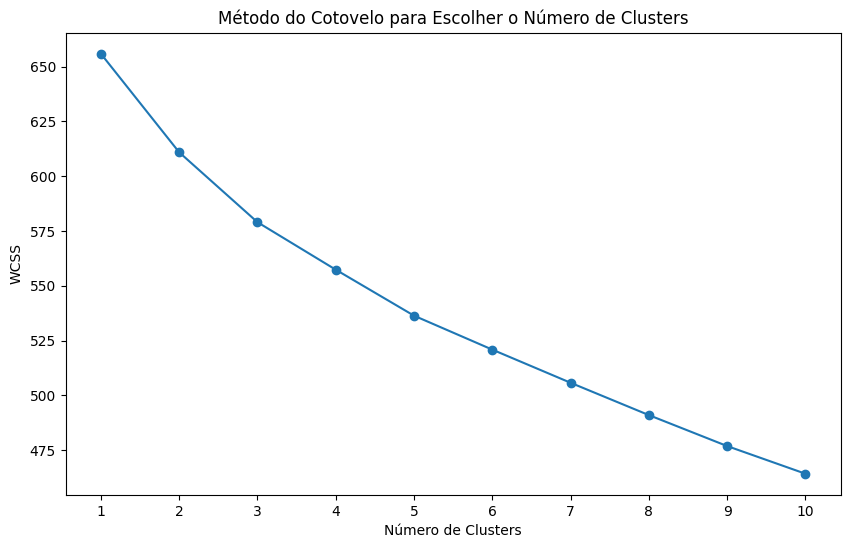

In [136]:
num_clusters = range(1, len(wcss) + 1)  # Garantir que tenha o mesmo comprimento de wcss

# Plotar o WCSS
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o', linestyle='-')
plt.title('Método do Cotovelo para Escolher o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(num_clusters)  # Adicionar rótulos nos pontos
plt.show()

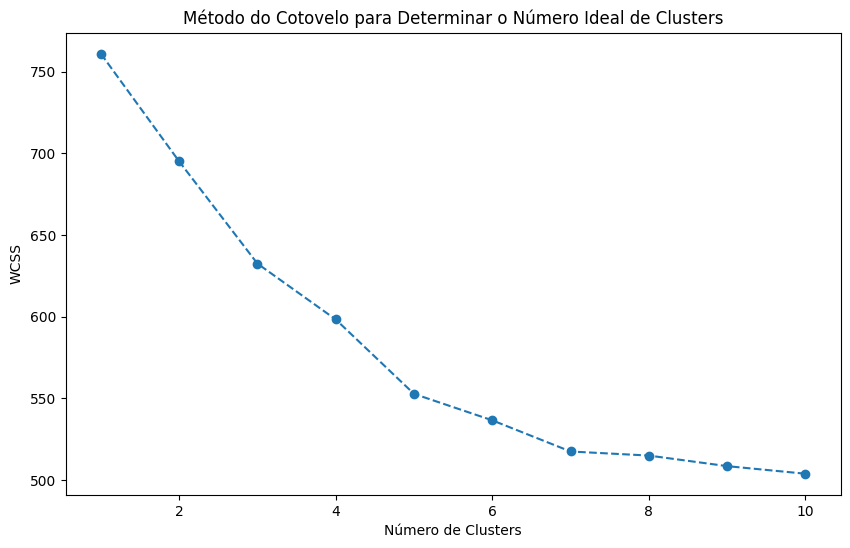

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()

In [65]:
assinantes.columns

Index(['id_fato', 'id_cliente', 'data_inscricao', 'rede_social', 'renda_id',
       'id_demografico', 'id_gosto', 'moda', 'pessoa_artistica', 'maquiagem',
       'brinquedos_ou_jogos', 'esportes', 'tem_pet', 'decorar_casa',
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica',
       'cuidados_pessoais', 'tecnologia', 'mae_ou_pai', 'influencer',
       'restricoes_alimentares', 'objetivo_id', 'id', 'data_nascimento',
       'genero', 'email', 'cidade', 'estado', 'idade', 'faixa_etaria',
       'bairro', 'assinantes', 'cluster'],
      dtype='object')

In [66]:
assinantes.head(5)

,id_fato,id_cliente,data_inscricao,rede_social,renda_id,id_demografico,id_gosto,moda,pessoa_artistica,maquiagem,...,data_nascimento,genero,email,cidade,estado,idade,faixa_etaria,bairro,assinantes,cluster
5,220,232,2024-05-10 12:52:00.000 -0300,0,R$0 - 3.000,220,220,1,0,0,...,2004-03-30 00:00:00,Feminino,flaviaferraresi3003@gmail.com,Piracaia,São Paulo,20.0,Adulto,Centro,1,0
425,640,685,2024-05-13 14:34:00.000 -0300,0,R$0 - 3.000,640,640,1,1,1,...,2001-03-19 00:00:00,Feminino,luannateixeira@gmail.com,Sao paulo,São Paulo,23.0,Adulto,Santo Amaro,1,0
575,790,837,2024-05-14 07:06:00.000 -0300,1,R$8.000 - 16.000,790,790,1,0,1,...,1994-03-09 00:00:00,Feminino,taynaraigor@yahoo.com.br,São Paulo,São Paulo,30.0,Adulto,Chácara Califórnia,1,3
621,836,874,2024-05-14 07:06:00.000 -0300,1,R$3.000 - 8.000,836,836,1,1,1,...,1965-09-25 00:00:00,Masculino,akunath@pelicantextil.com.br,Indaiatuba,São Paulo,59.0,Adulto,Jardim Residencial Santa Clara,1,1
675,890,943,2024-05-14 07:58:00.000 -0300,0,R$0 - 3.000,890,890,1,1,0,...,1996-10-19 00:00:00,Feminino,amandatomaz1996@gmail.com,São José dos Campos,São Paulo,28.0,Adulto,Condomínio Royal Park,1,0


In [67]:
cluster1 = assinantes[assinantes['cluster'] == 0]
cluster2 = assinantes[assinantes['cluster'] == 1]
cluster3 = assinantes[assinantes['cluster'] == 2]

# cluster1.info()
# cluster2.info()
# cluster3.info()


In [68]:
# Selecionar apenas colunas numéricas para o cálculo da média por cluster
numeric_features = assinantes.select_dtypes(include=[np.number])

# Adicionar a coluna 'cluster' para agrupar
numeric_features['cluster'] = assinantes['cluster']

# Calcular a média para cada cluster usando apenas colunas numéricas
cluster_means = numeric_features.groupby('cluster').mean()


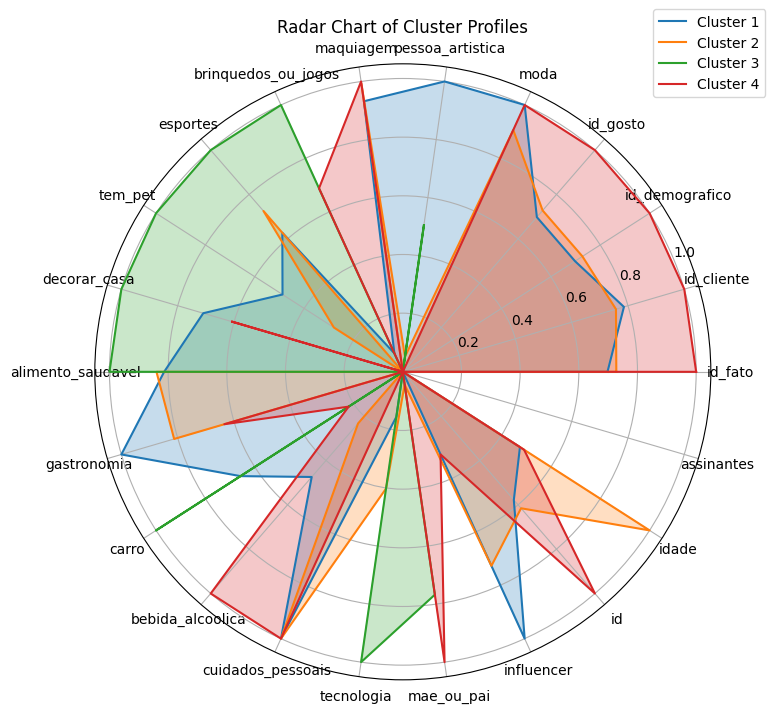

In [69]:


# Normalize the data for the radar chart visualization (0 to 1 scale)
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), columns=cluster_means.columns)

# Define the number of variables and clusters
num_clusters = cluster_means_scaled.shape[0]
num_vars = cluster_means_scaled.shape[1]

# Define angles for each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop for the radar chart

# Plot each cluster on the radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for i in range(num_clusters):
    values = cluster_means_scaled.iloc[i].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

# Add feature labels to the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(cluster_means.columns, fontsize=10)

# Add title and legend
plt.title('Radar Chart of Cluster Profiles')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [75]:
from sklearn.metrics import silhouette_score

# Example: calculate silhouette score for different cluster numbers
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters = 2, the silhouette score is 0.1470457580627647
For n_clusters = 3, the silhouette score is 0.1513487832692116
For n_clusters = 4, the silhouette score is 0.10795455381077687
For n_clusters = 5, the silhouette score is 0.09982984084308741
For n_clusters = 6, the silhouette score is 0.07929076275320943
For n_clusters = 7, the silhouette score is 0.0724587478802043
For n_clusters = 8, the silhouette score is 0.06463681716537935
For n_clusters = 9, the silhouette score is 0.04696134306112317
